We will be analyzing restaurant data from the different restaurants we specified in Progress Report #1.

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading pac

True

In [2]:
data = pd.read_csv('data/nepali.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,Nepali Bhanchha Ghar,4,Great food here,2024-04-24 09:25:33.915035
1,Nepali Bhanchha Ghar,1,Went for dinner few weeks ago. The sekuwa was ...,2024-04-23 15:25:33.922933
2,Nepali Bhanchha Ghar,5,Truly delicious jhol momo. The server even pro...,2024-04-18 15:25:33.925566
3,Nepali Bhanchha Ghar,5,NaN,2024-04-18 15:25:33.928087
4,Nepali Bhanchha Ghar,5,A must go to place to go for really good Nepal...,2024-04-17 15:25:33.930419
...,...,...,...,...
667,Nepali Bhanchha Ghar,1,Worst place to go.They charged just double to ...,2018-04-24 15:26:13.244503
668,Nepali Bhanchha Ghar,5,Nice,2018-04-24 15:26:13.245709
669,Nepali Bhanchha Ghar,5,"I am sharing the rain in New York, wow, what a...",2018-04-24 15:26:13.246897
670,Nepali Bhanchha Ghar,5,me my girlfriend vitiated in New York we find ...,2018-04-24 15:26:13.804584


Extracting Year from 'published_at_date' column

In [3]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_86305/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,Nepali Bhanchha Ghar,4,Great food here,2024
1,Nepali Bhanchha Ghar,1,Went for dinner few weeks ago. The sekuwa was ...,2024
2,Nepali Bhanchha Ghar,5,Truly delicious jhol momo. The server even pro...,2024
3,Nepali Bhanchha Ghar,5,NaN,2024
4,Nepali Bhanchha Ghar,5,A must go to place to go for really good Nepal...,2024
...,...,...,...,...
667,Nepali Bhanchha Ghar,1,Worst place to go.They charged just double to ...,2018
668,Nepali Bhanchha Ghar,5,Nice,2018
669,Nepali Bhanchha Ghar,5,"I am sharing the rain in New York, wow, what a...",2018
670,Nepali Bhanchha Ghar,5,me my girlfriend vitiated in New York we find ...,2018


Charts for ratings

<AxesSubplot:xlabel='rating'>

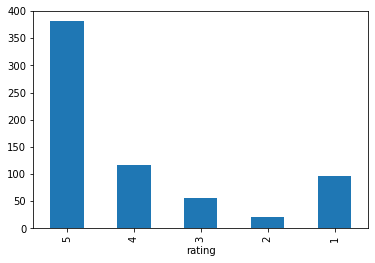

In [4]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

<AxesSubplot:title={'center':'Restaurant Ratings'}, ylabel='count'>

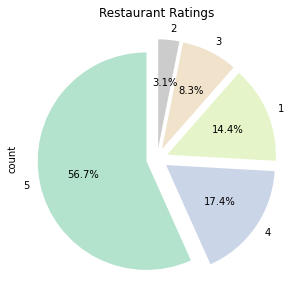

In [5]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 10,
    explode    = (0.1,0.1,0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Restaurant Ratings'
)

df['rating'].value_counts().plot.pie(**kwargs)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

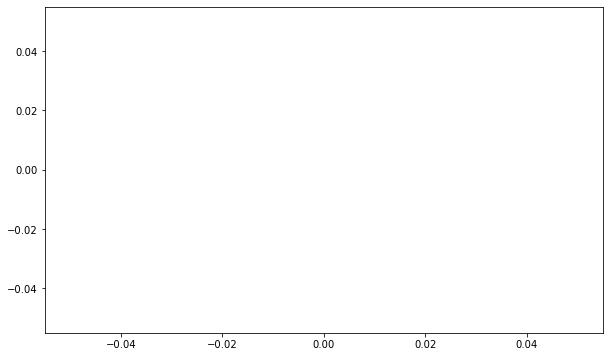

In [6]:
rating_counts = df.groupby(['published_at_date', 'rating']).size().unstack(fill_value=0)

total_ratings_per_year = rating_counts.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_ratings_per_year, marker='o', color='skyblue', linewidth=2.5)
plt.axvline(x=2016, color='blue', linestyle='--', label='Year 2016')


plt.title('Total Count of Ratings Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Total Count of Ratings')
plt.tight_layout()
plt.show()

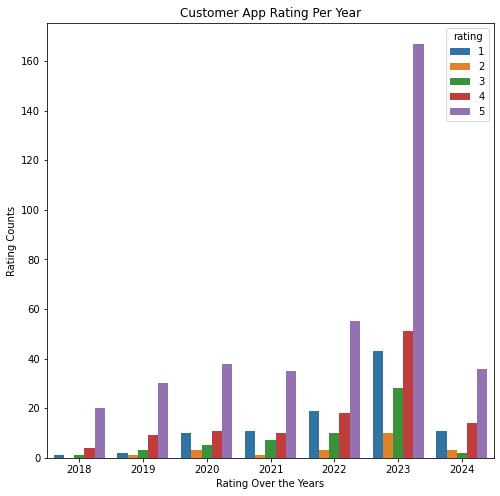

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [8]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_86305/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,Great food here
1,Went for dinner few weeks ago. The sekuwa was ...
2,Truly delicious jhol momo. The server even pro...
3,<NA>
4,A must go to place to go for really good Nepal...
...,...
667,Worst place to go.They charged just double to ...
668,Nice
669,"I am sharing the rain in New York, wow, what a..."
670,me my girlfriend vitiated in New York we find ...


In [9]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [10]:
test_sentence = "Service was excellent, food was delicious, and vibe was great ! We got the korean style boneless fried chicken (sweet chili sauce was fire), veg buckwheat pancake, and spicy chicken. Our server was so kind and attentive & we had a great experience; the sweet treat cookie at end was so cute :)"

preprocess(test_sentence)

'servic excel food delici vibe great korean style boneless fri chicken sweet chili sauc fire veg buckwheat pancak spici chicken server kind attent great experi sweet treat cooki end cute'

In [10]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_86305/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,Nepali Bhanchha Ghar,4,Great food here,2024,great food
1,Nepali Bhanchha Ghar,1,Went for dinner few weeks ago. The sekuwa was ...,2024,dinner week ago sekuwa badd nightmar
2,Nepali Bhanchha Ghar,5,Truly delicious jhol momo. The server even pro...,2024,delici jhol momo server provid bit broth home ...
3,Nepali Bhanchha Ghar,5,<NA>,2024,
4,Nepali Bhanchha Ghar,5,A must go to place to go for really good Nepal...,2024,place good nepali food made love tradit momo g...


In [11]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('momo', 317),
 ('food', 237),
 ('good', 134),
 ('order', 102),
 ('jhol', 100),
 ('nepali', 94),
 ('servic', 91),
 ('place', 88),
 ('chicken', 78),
 ('roti', 67),
 ('restaur', 66),
 ('thali', 62),
 ('tast', 56),
 ('sel', 56),
 ('time', 54),
 ('great', 52),
 ('delici', 52),
 ('love', 46),
 ('goat', 44),
 ('back', 42),
 ('nice', 41),
 ('flavor', 36),
 ('beef', 36),
 ('experi', 36),
 ('fri', 35),
 ('eat', 34),
 ('wait', 32),
 ('authent', 31),
 ('price', 31),
 ('soup', 30),
 ('recommend', 30),
 ('bad', 30),
 ('amaz', 29),
 ('custom', 28),
 ('dish', 24),
 ('serv', 23),
 ('fresh', 22),
 ('spici', 22),
 ('tabl', 22),
 ('veg', 22),
 ('tasti', 22),
 ('vegetarian', 22),
 ('make', 22),
 ('tea', 21),
 ('worst', 21),
 ('steam', 21),
 ('ghar', 21),
 ('staff', 21),
 ('friendli', 21),
 ('sauc', 20)]

In [12]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_86305/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,Nepali Bhanchha Ghar,4,Great food here,2024,great food,1
1,Nepali Bhanchha Ghar,1,Went for dinner few weeks ago. The sekuwa was ...,2024,dinner week ago sekuwa badd nightmar,-1
2,Nepali Bhanchha Ghar,5,Truly delicious jhol momo. The server even pro...,2024,delici jhol momo server provid bit broth home ...,1
3,Nepali Bhanchha Ghar,5,<NA>,2024,,1
4,Nepali Bhanchha Ghar,5,A must go to place to go for really good Nepal...,2024,place good nepali food made love tradit momo g...,1
...,...,...,...,...,...,...
667,Nepali Bhanchha Ghar,1,Worst place to go.They charged just double to ...,2018,worst place charg doubl bill ask ladi owner ma...,-1
668,Nepali Bhanchha Ghar,5,Nice,2018,nice,1
669,Nepali Bhanchha Ghar,5,"I am sharing the rain in New York, wow, what a...",2018,share rain york wow secret today world mother ...,1
670,Nepali Bhanchha Ghar,5,me my girlfriend vitiated in New York we find ...,2018,girlfriend vitiat york find lot nepali restur ...,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

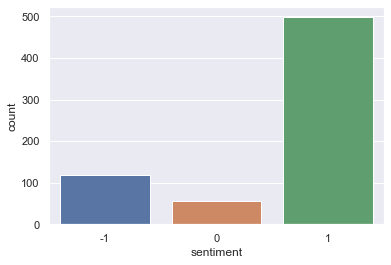

In [13]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [14]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_86305/3818571148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0      0.6249
1      0.0000
2      0.7269
3      0.0000
4      0.7964
        ...  
667   -0.8074
668    0.4215
669    0.7184
670    0.8402
671    0.0000
Name: review_sentiment, Length: 672, dtype: float64

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.7738095238095238

<AxesSubplot:xlabel='published_at_date', ylabel='review_sentiment'>

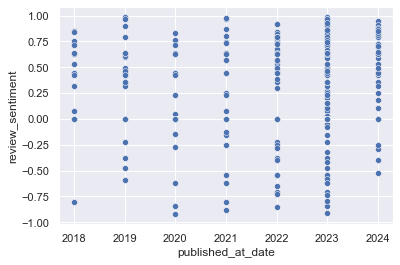

In [18]:
sns.scatterplot(data=df, x='published_at_date', y='review_sentiment')

<AxesSubplot:xlabel='published_at_date', ylabel='review_sentiment'>

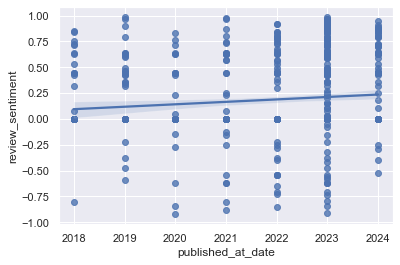

In [19]:
sns.regplot(x="published_at_date", y="review_sentiment", data=df)

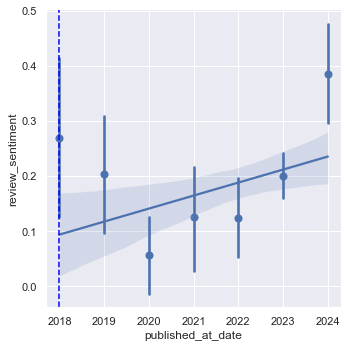

In [20]:
sns.lmplot(x="published_at_date", y="review_sentiment", data=df, x_estimator=np.mean)
plt.axvline(x=2018, color='blue', linestyle='--', label='Year 2018')

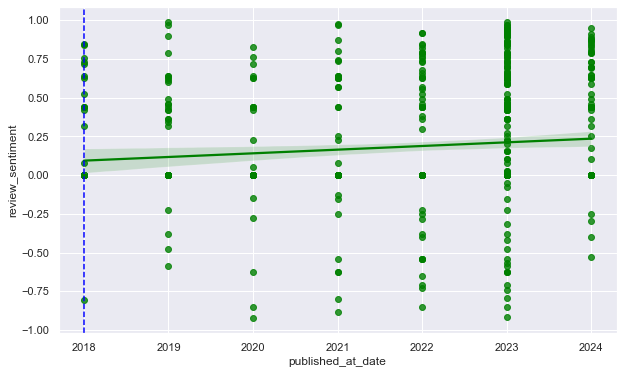

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='green')
plt.axvline(x=2018, color='blue', linestyle='--', label='Year 2018')

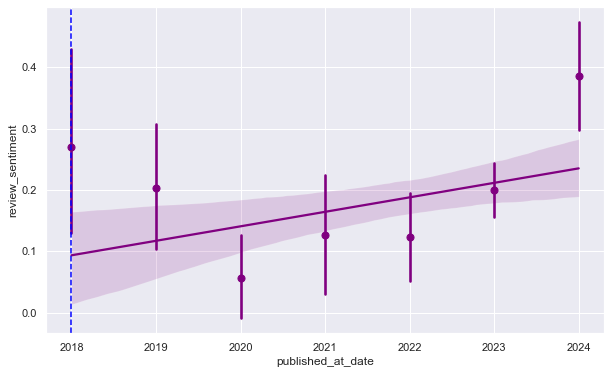

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='purple', x_estimator=np.mean)
plt.axvline(x=2018, color='blue', linestyle='--', label='Year 2018')

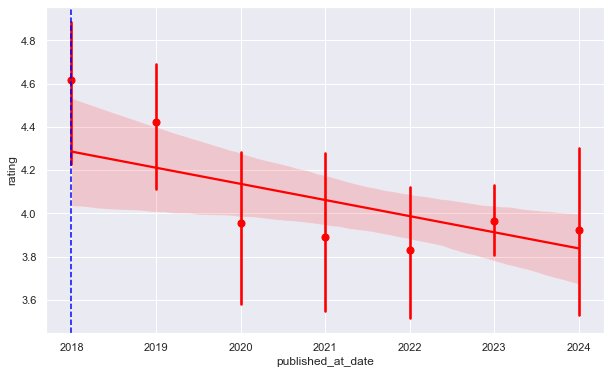

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='rating', marker='o', color='red', x_estimator=np.mean)
plt.axvline(x=2018, color='blue', linestyle='--', label='Year 2018')

In [ ]:
# make altered data into csv file
df.to_csv('altdata/' + 'nepali.csv', index=False)